In [103]:
#import custom module with defined functions
from kinase_module import *


In [34]:
# imports

from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:
import numpy as np



def add_gausian(y,mu,sigma):
    noise = np.random.normal(mu,sigma,[1381, 117])
    df_aug = df +noise 
    df_new = pd.concat([df,df_aug])
    return(df_new)

def drop_corr(df):
    '''Function drops highly correlated columns above a 0.95 threshold and outputs a new dataframe.

    Input:
        df: pandas DataFrame
        '''
    import numpy as np
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column]>0.95)]
    df_new = df.drop(df[to_drop],axis = 1)
    return(df_new)

def model_eval(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    #model_score = model.score(X_test,y_test)
    model_mse =  mse(y_test,pred)
    model_r2 =r2(y_test,pred)
    return(model_mse, model_r2)

In [19]:

#Data frame
#pd.read_csv('~/Desktop/data/kinase_files/KinaseP00533.csv')
df = pd.read_csv('~/Desktop/data/kinase_files/KinaseO00329.csv')
df.head()

,Unnamed: 0,target_id,pAc,smiles,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,0,O00329,1.4,CS(=O)(=O)C1=CN=CC(=C1)C2=CC3=NC(=NN3C=C2)N,0.7770,73.7402,114.564286,103.24,289.320,289.063346,...,0,0,1,2,0,0,0,0,2,1
1,1,O00329,1.5,C1=CN2C(=NC(=N2)N)C=C1C3=CC(=CN=C3)S(=O)(=O)N,0.0209,72.0036,113.674613,129.26,290.308,290.058595,...,0,0,1,2,0,0,0,0,2,1
2,2,O00329,1.5,CC(C)NS(=O)(=O)C1=CN=CC(=C1)C2=CC3=NC(=NN3C=C2)N,1.0602,86.0879,132.979410,115.27,332.389,332.105545,...,0,0,1,2,0,0,0,0,2,1
3,3,O00329,1.5,CC1(CCN1S(=O)(=O)C2=CN=CC(=C2)C3=CC4=NC(=NN4C=...,1.5465,93.2182,144.913435,106.48,358.427,358.121195,...,0,1,1,2,0,0,0,0,2,1
4,4,O00329,1.5,CC(C)(C(F)(F)F)NS(=O)(=O)C1=CN=CC(=C1)C2=CC3=N...,1.9927,91.0859,151.840959,115.27,400.386,400.092929,...,0,0,1,2,0,0,0,0,2,1


In [20]:
#Check the shape of the dataframe
df.shape

(1381, 120)

In [21]:
drop_corr(df).head()

,Unnamed: 0,target_id,smiles,SlogP,SMR,TPSA,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,...,MQN32,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41
0,0,O00329,CS(=O)(=O)C1=CN=CC(=C1)C2=CC3=NC(=NN3C=C2)N,0.7770,73.7402,103.24,7,2,2,1,...,0,0,0,1,2,0,0,0,0,2
1,1,O00329,C1=CN2C(=NC(=N2)N)C=C1C3=CC(=CN=C3)S(=O)(=O)N,0.0209,72.0036,129.26,8,4,2,2,...,0,0,0,1,2,0,0,0,0,2
2,2,O00329,CC(C)NS(=O)(=O)C1=CN=CC(=C1)C2=CC3=NC(=NN3C=C2)N,1.0602,86.0879,115.27,8,3,4,2,...,0,0,0,1,2,0,0,0,0,2
3,3,O00329,CC1(CCN1S(=O)(=O)C2=CN=CC(=C2)C3=CC4=NC(=NN4C=...,1.5465,93.2182,106.48,8,2,3,1,...,1,0,1,1,2,0,0,0,0,2
4,4,O00329,CC(C)(C(F)(F)F)NS(=O)(=O)C1=CN=CC(=C1)C2=CC3=N...,1.9927,91.0859,115.27,8,3,4,2,...,0,0,0,1,2,0,0,0,0,2


In [22]:
drop_corr(df).shape

(1381, 93)

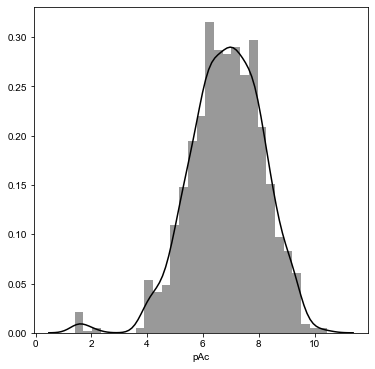

In [23]:
#Plot distribution of the pAc with the density estimation function
f, ax = plt.subplots(figsize=(6, 6))
sns.distplot(df.pAc,color = 'black');
sns.set_style("whitegrid")

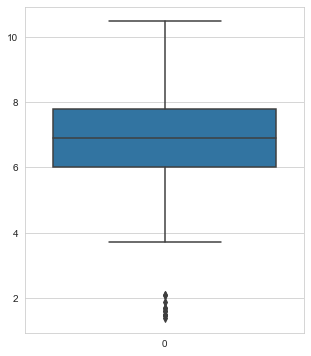

In [24]:
#Boxplot of pAc,It has a few outliers but the distribution in fairly normal
f, ax = plt.subplots(figsize=(5, 6))
sns.set_style("whitegrid")
data = df.pAc
sns.boxplot(data=data);

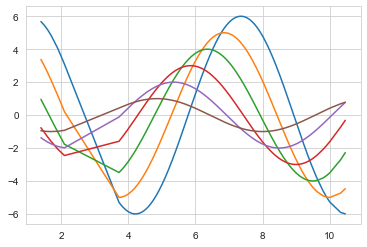

In [25]:
def sinplot(flip=1):
    x = df.pAc
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()

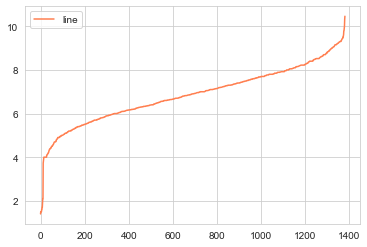

In [26]:
#line plot
ax = sns.lineplot(data=df["pAc"], color="coral", label="line")

In [27]:
#Drop unwanted colum(unnamed)
df = df.drop(['Unnamed: 0','smiles','target_id'], axis=1)
df.head()

,pAc,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,1.4,0.7770,73.7402,114.564286,103.24,289.320,289.063346,7,2,2,...,0,0,1,2,0,0,0,0,2,1
1,1.5,0.0209,72.0036,113.674613,129.26,290.308,290.058595,8,4,2,...,0,0,1,2,0,0,0,0,2,1
2,1.5,1.0602,86.0879,132.979410,115.27,332.389,332.105545,8,3,4,...,0,0,1,2,0,0,0,0,2,1
3,1.5,1.5465,93.2182,144.913435,106.48,358.427,358.121195,8,2,3,...,0,1,1,2,0,0,0,0,2,1
4,1.5,1.9927,91.0859,151.840959,115.27,400.386,400.092929,8,3,4,...,0,0,1,2,0,0,0,0,2,1


In [28]:
df.shape

(1381, 117)

In [29]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df.drop(columns=['pAc'],axis=1)
# Get the target vector
y = df["pAc"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [31]:
#Check the shape of the training and testing data 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((966, 116), (415, 116), (966,), (415,))

In [32]:
X_test
print(X_test.shape)
y_test.shape

(415, 116)


(415,)

In [40]:
from sklearn.metrics.scorer import make_scorer
scoring = {'prec_macro': 'precision_macro','rec_macro': make_scorer(recall_score, average='macro')}
scores = cross_validate(clf,X,y, scoring=scoring,cv=5, return_train_score=True)
sorted(scores.keys()) 

NameError: name 'recall_score' is not defined

In [35]:

cv_r2_scores_rf = cross_val_score(rf(), X, y, cv=6,scoring='r2')
print(cv_r2_scores_rf)
print("Mean 6-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\P

[ -3.79327673 -17.40922894 -14.15429804 -19.89592679 -18.87910956
  -9.15463727]
Mean 6-Fold R Squared: -13.881079554995893


In [36]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True)

In [39]:

scores = []
for i in range(5):
    result = next(kf.split(df), None)
  
    model = rf().fit(X_train,y_train)
    predictions = rf.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

C:\ProgramData\Anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Number of labels=1104 does not match number of samples=966

###### Add the X_train and y_train to form a a training set for augmentation

In [128]:
df_train_set = pd.concat([X_train, y_train], axis = 1)
df_train_set.head()

,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,...,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42,pAc
592,2.74670,92.8582,143.954692,63.69,345.424,345.114712,6,1,2,1,...,0,1,3,0,0,0,0,4,2,6.640
858,5.13408,116.6794,180.702227,95.21,431.862,431.106149,7,2,4,2,...,0,2,3,0,0,0,0,4,2,7.300
271,1.95420,85.6116,131.088799,115.87,318.768,318.099587,7,5,3,3,...,0,1,2,0,0,0,0,2,1,5.790
1275,3.40440,135.4708,209.710836,99.05,488.596,488.264822,10,1,5,1,...,0,3,2,1,0,0,0,4,2,8.620
785,6.24672,150.1270,218.190532,37.83,491.635,491.257277,5,0,3,0,...,0,1,6,0,0,0,0,5,2,7.115


VALIDATION SET FOR EXTERNAL VALIDATION

In [132]:
X_test_val = X_test
y_test_val = y_test

In [ ]:

cv_r2_scores_rf = cross_val_score(rf_reg, predictors, target, cv=5,scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

In [40]:
cv_results = cv(rf(), X, y, cv=6)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=6, n_jobs=1)
print(this_scores)
this_scores.mean()

[ -3.64826497 -16.82490591 -13.40110028 -23.06746057 -18.64565378
  -9.4873194 ]


-14.179117485914594

In [ ]:
#Model with Random forest
print(model_eval(rf()))

In [ ]:
#Add noise of 0.01 to the dataframe
df1 = add_gausian(df,0,0.1)

df1.shape

In [ ]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df1.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df1["pAc"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [ ]:

print(model_eval(rf()))

In [ ]:
cv_results = cross_validate(rf(), X, y, cv=10)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=10, n_jobs=1)
print(this_scores)
this_scores.mean()

In [ ]:
#Add noise of 0.02 to the dataframe
df2 = add_gausian(df,0,0.2)
df2 = pd.concat([df,df2])
df2.shape

In [ ]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df2.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df2["pAc"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [ ]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df2.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df2["pAc"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
print(model_eval(rf()))

In [ ]:
cv_results = cross_validate(rf(), X, y, cv=10)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=10, n_jobs=1)
print(this_scores)
this_scores.mean()

In [ ]:
#Add noise of 0.03 to the dataframe
df3 = add_gausian(df,0,0.3)
df3 = pd.concat([df2,df3])
df3.shape

In [ ]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df3.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df3["pAc"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [ ]:
print(model_eval(rf()))

In [ ]:
cv_results = cross_validate(rf(), X, y, cv=10)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=10, n_jobs=1)
print(this_scores)
this_scores.mean()

In [ ]:
#Add noise of 0.04 to the dataframe
df4 = add_gausian(df,0,0.4)
df4 = pd.concat([df3,df4])
df4.shape

In [ ]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df4.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df4["pAc"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [ ]:
print(model_eval(rf()))

In [ ]:
cv_results = cross_validate(rf(), X, y, cv=10)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=10, n_jobs=1)
print(this_scores)
this_scores.mean()

In [ ]:
#Add noise of 0.05 to the dataframe
df5 = add_gausian(df,0,0.5)
df5 = pd.concat([df4,df5])
df5.shape

In [ ]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df5.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df5["pAc"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [ ]:
print(model_eval(rf()))

In [ ]:
cv_results = cross_validate(rf(), X, y, cv=10)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=10, n_jobs=1)
print(this_scores)
this_scores.mean()